In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
d=pd.read_csv('preprocess.csv')
d.head()

,Unnamed: 0,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,revol_bal_joint,terms_compl
0,0,16000,16000,60,12.74,361.93,C,10,MORTGAGE,130000.0,...,42.0,79.0,0.0,0.0,0.0,0,0.0,42.0,0.0,13.0
1,1,11875,11875,36,11.44,391.26,B,10,MORTGAGE,55000.0,...,75.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0
2,2,26000,26000,60,15.99,632.14,C,10,RENT,52000.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0
3,3,35000,35000,36,19.99,1300.55,D,10,MORTGAGE,80000.0,...,4.0,0.0,48.0,0.0,0.0,0,48.0,48.0,0.0,23.0
4,4,14000,14000,60,12.74,316.69,C,4,OWN,40000.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0


In [5]:
d=d[d['loan_status']!=2]

In [6]:
cat = d[['term',  'grade','issue_d', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
     'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 
     'disbursement_method','debt_settlement_flag', 'verification_status_joint']]
d1=pd.get_dummies(data=d,columns=cat.columns,drop_first=True)
d1.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
d1train=d1[d1['loan_status']!=2]
d1current=d1[d1['loan_status']==2]

# Without Transformation

In [18]:
import statsmodels.api as sm
y=d1['loan_status']
x=d1.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt'],axis=1)
xc=sm.add_constant(x)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif4 = [variance_inflation_factor(xc.values, i) for i in range(xc.shape[1])]
vifdf4=pd.DataFrame({'vif': vif4[1:]}, index=x.columns)

C:\Users\Arun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
pd.set_option('display.Max_rows',200)

In [20]:
vifdf4

,vif
funded_amnt,11.946219
int_rate,22.891267
emp_length,1.130410
annual_inc,1.045306
dti,1.223571
delinq_2yrs,2.617784
earliest_cr_line,7.570053
inq_last_6mths,1.698956
pub_rec,11.868477
revol_bal,21.229420


In [22]:
import statsmodels.api as sm
y=d1['loan_status']
x=d1.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort'],axis=1)
xc=sm.add_constant(x)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif5 = [variance_inflation_factor(xc.values, i) for i in range(xc.shape[1])]
vifdf5=pd.DataFrame({'vif': vif5[1:]}, index=x.columns)

In [23]:
vifdf5

,vif
funded_amnt,8.616183
int_rate,22.850833
emp_length,1.125085
annual_inc,1.044001
dti,1.206527
delinq_2yrs,2.609187
earliest_cr_line,7.462869
inq_last_6mths,1.669521
pub_rec,11.864447
revol_bal,12.120255


In [24]:
import statsmodels.api as sm
y=d1['loan_status']
x=d1.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
          'total_bc_limit','addr_state_CA','application_type_1'],axis=1)
xc=sm.add_constant(x)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif5 = [variance_inflation_factor(xc.values, i) for i in range(xc.shape[1])]
vifdf5=pd.DataFrame({'vif': vif5[1:]}, index=x.columns)

In [25]:
vifdf5

,vif
funded_amnt,8.611601
int_rate,22.845136
emp_length,1.124019
annual_inc,1.043650
dti,1.205911
delinq_2yrs,2.605753
earliest_cr_line,7.462688
inq_last_6mths,1.669453
pub_rec,11.864067
revol_bal,12.103998


In [26]:
import statsmodels.api as sm
y=d1['loan_status']
x=d1.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
          'total_bc_limit','addr_state_CA','application_type_1','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G',
          'sec_app_open_acc','num_rev_accts','total_rev_hi_lim','pub_rec','revol_bal','last_pymnt_amnt'],axis=1)
xc=sm.add_constant(x)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif5 = [variance_inflation_factor(xc.values, i) for i in range(xc.shape[1])]
vifdf5=pd.DataFrame({'vif': vif5[1:]}, index=x.columns)

In [27]:
vifdf5

,vif
funded_amnt,8.601577
int_rate,2.933045
emp_length,1.123204
annual_inc,1.042844
dti,1.203616
delinq_2yrs,2.585687
earliest_cr_line,7.428267
inq_last_6mths,1.663527
revol_util,5.583364
out_prncp,5.303418


In [5]:
from sklearn.model_selection import train_test_split
x=d1train.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
          'total_bc_limit','addr_state_CA','application_type_1','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G',
          'sec_app_open_acc','num_rev_accts','total_rev_hi_lim','pub_rec','revol_bal','last_pymnt_amnt','out_prncp'],axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

# Without Feature Selection

# Logistic Regression

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Confusion Matrix:  [[91732  2989]
 [ 3990 21559]]
Train Accuracy score:  0.9419722291510767
Train ROC AUC score:  0.9780604862046346
Train Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.96     94721
           1       0.88      0.84      0.86     25549

    accuracy                           0.94    120270
   macro avg       0.92      0.91      0.91    120270
weighted avg       0.94      0.94      0.94    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.96     40705
           1       0.88      0.85      0.86     10840

    accuracy                           0.94     51545
   macro avg       0.92      0.91      0.91     51545
weighted avg       0.94      0.94      0.94     51545

Test Confusion Matrix:  [[39416  1289]
 [ 1609  9231]]
Test Accuracy score:  0.9437772819866136
Test ROC AUC score:  0.9789674129083754


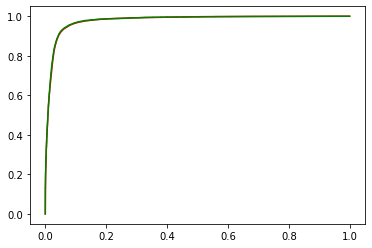

In [32]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

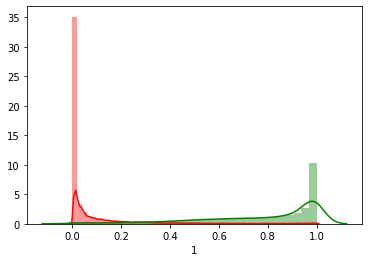

In [33]:
y_tt=pd.DataFrame([y_test.values,y_prob]).T
d0=y_tt[y_tt[0]==0.0]
d1=y_tt[y_tt[0]==1.0]
sns.distplot(d0[1],color='r')
sns.distplot(d1[1],color='g')

# Decision Tree

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[94721     0]
 [    0 25549]]
Auc of train:  1.0
Accuracy score of test:  0.9775341934232225
Confusion Matrix of test:  [[40093   612]
 [  546 10294]]
Auc of test:  0.9672979941628429


# Grid Search DT

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
max_depth=[2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9,10]
min_samples_leaf=[6,7,8,9,10,11,12,13,14,15,16,17,18]
criterion = ['gini','entropy']
param_grid={'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
gsearch=GridSearchCV(dtc, param_grid=param_grid, scoring='roc_auc',cv=3,n_jobs=-1)
gsearch.fit(X_train,y_train)
dtc=DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(gsearch.best_params_)

Accuracy score of train:  0.9763864637898063
Confusion Matrix of train:  [[93802   919]
 [ 1921 23628]]
Auc of train:  0.996836679491209
Accuracy score of test:  0.9757105441846929
Confusion Matrix of test:  [[40256   449]
 [  803 10037]]
Auc of test:  0.9951364216749894
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 2}


In [ ]:
df_feature_imp = pd.DataFrame(dtc.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))

# Randomized search DT

In [36]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':sp_randint(2,20),'min_samples_split':sp_randint(2,100),'min_samples_leaf':sp_randint(1,100),'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
rsearch=RandomizedSearchCV(dtc,param_distributions=params,n_iter=200, cv=3, scoring='roc_auc' ,n_jobs=-1)
rsearch.fit(X_train,y_train)
dtc=DecisionTreeClassifier(**rsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(rsearch.best_params_)

Accuracy score of train:  0.9794961336991769
Confusion Matrix of train:  [[93992   729]
 [ 1737 23812]]
Auc of train:  0.997776655227321
Accuracy score of test:  0.9791638374236105
Confusion Matrix of test:  [[40377   328]
 [  746 10094]]
Auc of test:  0.9959956549940148
{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 88, 'min_samples_split': 62}


In [ ]:
df_feature_imp = pd.DataFrame(dtc.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score of train:  0.997064937224578
Confusion Matrix of train:  [[94700    21]
 [  332 25217]]
Auc of train:  0.9999753560583358
Accuracy score of test:  0.9352410515083908
Confusion Matrix of test:  [[40115   590]
 [ 2748  8092]]
Auc of test:  0.9778834232083876


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,x.shape[1]),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='roc_auc',n_iter=100,cv=3)
rsearch.fit(X_train,y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(rsearch.best_params_)

Accuracy score of train:  0.9859565976552757
Confusion Matrix of train:  [[94426   295]
 [ 1394 24155]]
Auc of train:  0.9990267556244518
Accuracy score of test:  0.9839363662818896
Confusion Matrix of test:  [[40519   186]
 [  642 10198]]
Auc of test:  0.9985083951625661
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 98, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 138}


In [ ]:
df_feature_imp = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))

# Feature Selection

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
x= d.drop(['loan_status','term', 'grade',  'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
     'addr_state', 'initial_list_status', 'application_type', 'hardship_flag','disbursement_method', 'debt_settlement_flag','issue_d', 'verification_status_joint','Unnamed: 0','loan_amnt',
     'sec_app_open_acc','num_rev_accts','total_rev_hi_lim','pub_rec','revol_bal','last_pymnt_amnt','out_prncp','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
     'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
     'total_bc_limit'],axis=1)
y=d['loan_status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
model=SelectKBest(score_func=f_classif,k='all')
fit=model.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescore_num_classif=pd.concat([dfcolumns,dfscores],axis=1)
featurescore_num_classif.columns=['Features','Score_num_classif']
featurescore_num_classif['rank']=featurescore_num_classif['Score_num_classif'].rank(axis=0,ascending=False)
featurescore_num_classif.sort_values(by='rank',ascending=True)[:50]

,Features,Score_num_classif,rank
9,total_rec_prncp,31750.081507,1.0
1,int_rate,6901.502006,2.0
74,terms_compl,1906.959888,3.0
37,mort_acc,1071.556341,4.0
8,revol_util,1064.325436,5.0
30,bc_util,1063.294747,6.0
52,percent_bc_gt_75,972.288925,7.0
29,bc_open_to_buy,906.416019,8.0
55,tot_hi_cred_lim,894.633036,9.0
24,all_util,792.865655,10.0


In [19]:
from sklearn.preprocessing import LabelEncoder
cat=cat.astype('category')
for i in cat.columns:
    cat[i]=LabelEncoder.fit_transform(cat[i],cat[i])
x=cat
y=d['loan_status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
model=SelectKBest(score_func=chi2,k='all')
fit=model.fit(X_train,y_train)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X_train.columns)
featurescore_chi2_cat_le=pd.concat([dfcolumns,dfscores],axis=1)
featurescore_chi2_cat_le.columns=['Features','Score_cat_chi2_le']
featurescore_chi2_cat_le['rank']=featurescore_chi2_cat_le['Score_cat_chi2_le'].rank(axis=0,ascending=False)
featurescore_chi2_cat_le.sort_values(by='rank',ascending=True)[:10]

,Features,Score_cat_chi2_le,rank
11,debt_settlement_flag,8195.216882,1.0
2,home_ownership,1317.518889,2.0
0,term,1037.327734,3.0
3,verification_status,645.641611,4.0
1,issue_d,194.030104,5.0
9,hardship_flag,83.885717,6.0
7,initial_list_status,70.910737,7.0
4,pymnt_plan,65.813874,8.0
8,application_type,48.437400,9.0
5,purpose,16.771885,10.0


In [32]:
d2=d[['funded_amnt','loan_status', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
 'revol_util', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'collections_12_mths_ex_med',
 'acc_now_delinq', 'tot_coll_amt', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util',
 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_sats',
 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
 'total_il_high_credit_limit', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_revol_util',
 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'terms_compl',
 'home_ownership','term','verification_status','issue_d','initial_list_status','purpose']]

In [38]:
d2d=pd.get_dummies(data=d2,columns=['home_ownership','term','verification_status','issue_d','initial_list_status','purpose'],drop_first=True)

In [39]:
x=d2d.drop('loan_status',axis=1)
y=d2d['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

Train Confusion Matrix:  [[91606  3115]
 [ 3944 21605]]
Train Accuracy score:  0.9413070591169868
Train ROC AUC score:  0.9787222276286591
Train Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.96     94721
           1       0.87      0.85      0.86     25549

    accuracy                           0.94    120270
   macro avg       0.92      0.91      0.91    120270
weighted avg       0.94      0.94      0.94    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.96     40705
           1       0.87      0.85      0.86     10840

    accuracy                           0.94     51545
   macro avg       0.92      0.91      0.91     51545
weighted avg       0.94      0.94      0.94     51545

Test Confusion Matrix:  [[39373  1332]
 [ 1575  9265]]
Test Accuracy score:  0.9436026772722863
Test ROC AUC score:  0.9797475309478557


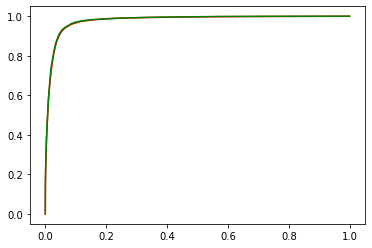

In [40]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

# Decision Tree

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[94721     0]
 [    0 25549]]
Auc of train:  1.0
Accuracy score of test:  0.9761567562324183
Confusion Matrix of test:  [[40052   653]
 [  576 10264]]
Auc of test:  0.9654106066917444


# Grid Search DT

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
max_depth=[2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9,10]
min_samples_leaf=[6,7,8,9,10,11,12,13,14,15,16,17,18]
criterion = ['gini','entropy']
param_grid={'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
gsearch=GridSearchCV(dtc, param_grid=param_grid, scoring='roc_auc',cv=3,n_jobs=-1)
gsearch.fit(X_train,y_train)
dtc=DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(gsearch.best_params_)

Accuracy score of train:  0.976369834538954
Confusion Matrix of train:  [[93819   902]
 [ 1940 23609]]
Auc of train:  0.9968830959187684
Accuracy score of test:  0.9758657483752061
Confusion Matrix of test:  [[40268   437]
 [  807 10033]]
Auc of test:  0.994984475646255
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 17, 'min_samples_split': 8}


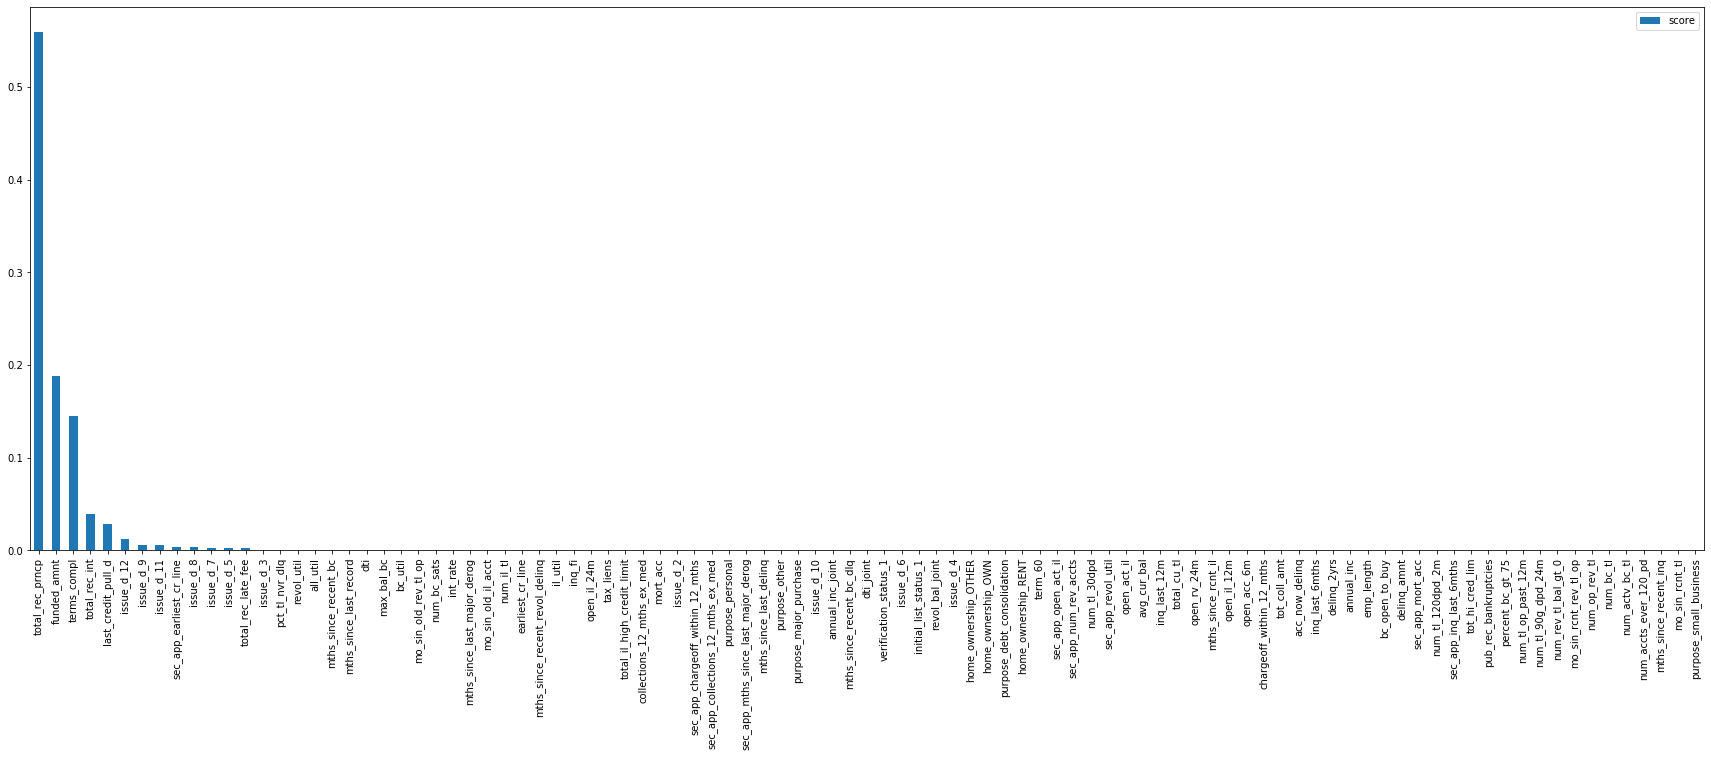

In [44]:
df_feature_imp = pd.DataFrame(dtc.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))

# Randomized search DT

In [45]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':sp_randint(2,20),'min_samples_split':sp_randint(2,100),'min_samples_leaf':sp_randint(1,100),'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
rsearch=RandomizedSearchCV(dtc,param_distributions=params,n_iter=200, cv=3, scoring='roc_auc' ,n_jobs=-1)
rsearch.fit(X_train,y_train)
dtc=DecisionTreeClassifier(**rsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(rsearch.best_params_)

Accuracy score of train:  0.9794961336991769
Confusion Matrix of train:  [[93992   729]
 [ 1737 23812]]
Auc of train:  0.9977750488401714
Accuracy score of test:  0.9791638374236105
Confusion Matrix of test:  [[40377   328]
 [  746 10094]]
Auc of test:  0.995949600922124
{'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 88, 'min_samples_split': 58}


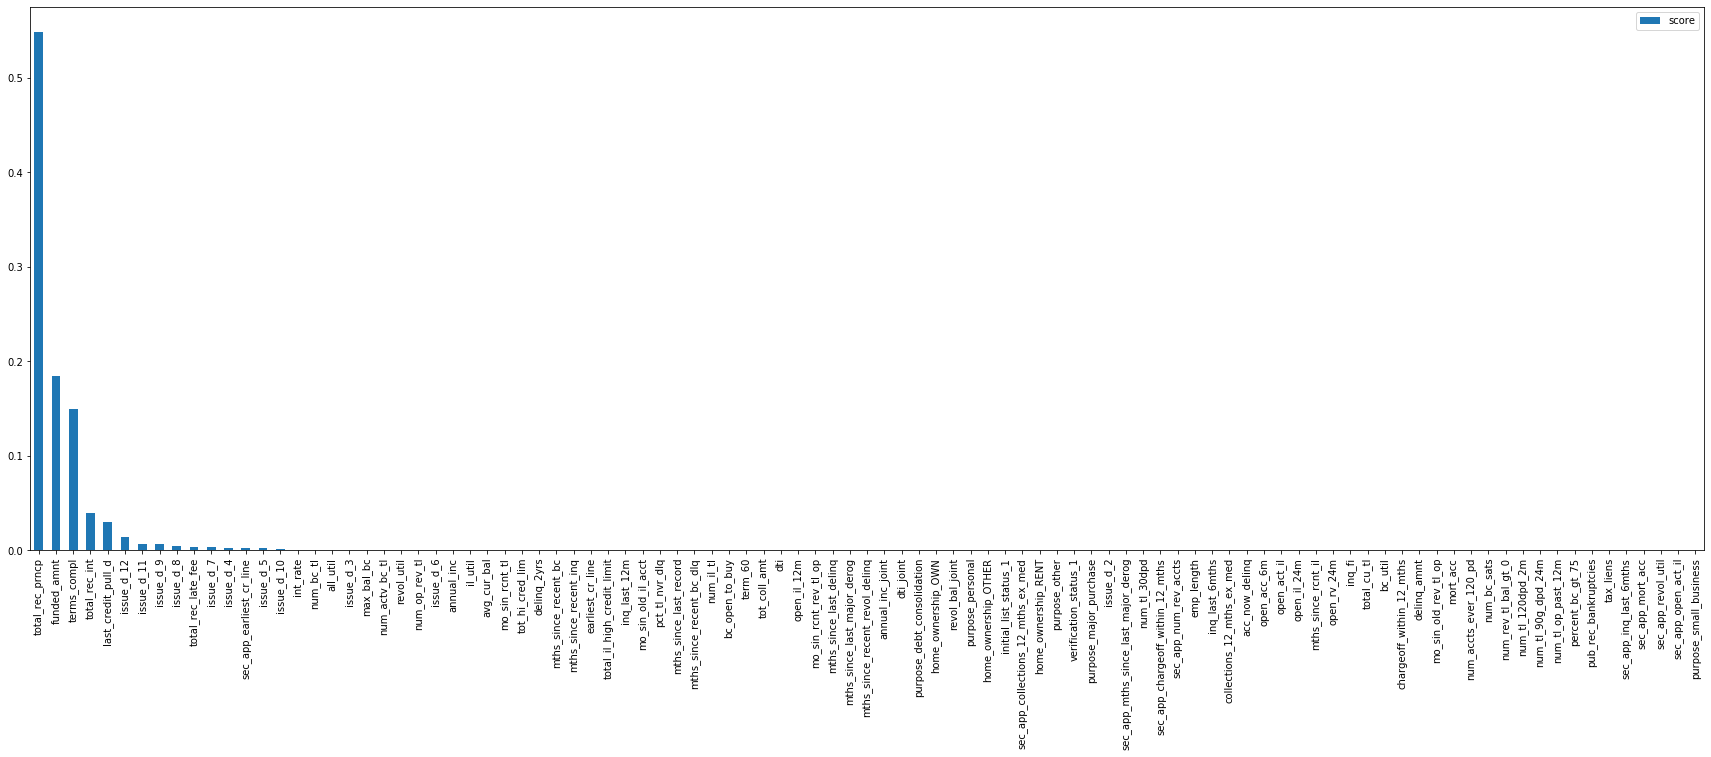

In [46]:
df_feature_imp = pd.DataFrame(dtc.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score of train:  0.9975471854992932
Confusion Matrix of train:  [[94703    18]
 [  277 25272]]
Auc of train:  0.999979520268368
Accuracy score of test:  0.950354059559608
Confusion Matrix of test:  [[40219   486]
 [ 2073  8767]]
Auc of test:  0.9852576759430536


In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,x.shape[1]),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='roc_auc',n_iter=100,cv=3)
rsearch.fit(X_train,y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(rsearch.best_params_)

Accuracy score of train:  0.9852664837449073
Confusion Matrix of train:  [[94477   244]
 [ 1528 24021]]
Auc of train:  0.9989387915170093
Accuracy score of test:  0.9835289552817926
Confusion Matrix of test:  [[40547   158]
 [  691 10149]]
Auc of test:  0.9982844104666325
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 76, 'min_samples_leaf': 4, 'min_samples_split': 21, 'n_estimators': 135}


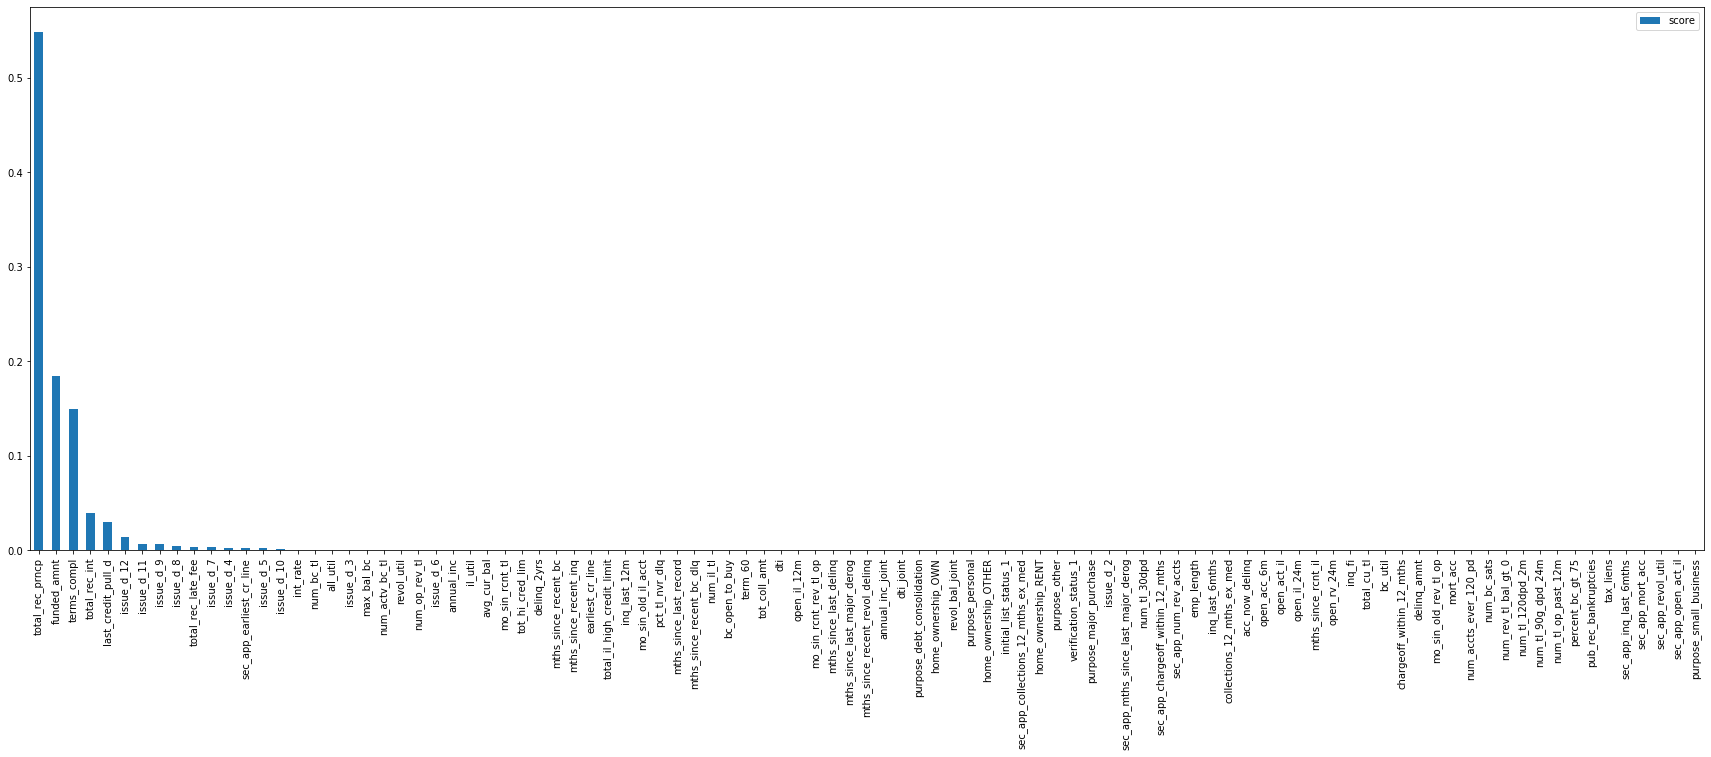

In [49]:
df_feature_imp = pd.DataFrame(dtc.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))

# Transformation

In [10]:
from sklearn.model_selection import train_test_split
x=d1train.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
          'total_bc_limit','addr_state_CA','application_type_1','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G',
          'sec_app_open_acc','num_rev_accts','total_rev_hi_lim','pub_rec','revol_bal','last_pymnt_amnt','out_prncp'],axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.preprocessing import PowerTransformer

In [13]:
transform=PowerTransformer(method='yeo-johnson')
X_train=transform.fit_transform(X_train)
X_test=transform.transform(X_test)

# Without Feature Selection

# Logistic Regression

Train Confusion Matrix:  [[93716  1005]
 [ 1174 24375]]
Train Accuracy score:  0.9818824311964746
Train ROC AUC score:  0.9958211388903573
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.96      0.95      0.96     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.95      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40242   463]
 [  498 10342]]
Test Accuracy score:  0.9813560966146085
Test ROC AUC score:  0.9960638284370807


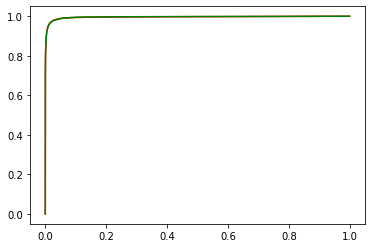

In [67]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

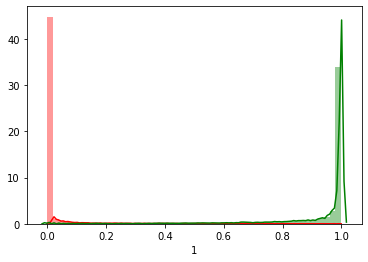

In [68]:
y_tt=pd.DataFrame([y_test.values,y_prob]).T
d0=y_tt[y_tt[0]==0.0]
d1=y_tt[y_tt[0]==1.0]
sns.distplot(d0[1],color='r')
sns.distplot(d1[1],color='g')

# Decision Tree

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[94721     0]
 [    0 25549]]
Auc of train:  1.0
Accuracy score of test:  0.9769521777087982
Confusion Matrix of test:  [[40063   642]
 [  546 10294]]
Auc of test:  0.966929489065189


# Grid Search DT

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
max_depth=[2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9,10]
min_samples_leaf=[6,7,8,9,10,11,12,13,14,15,16,17,18]
criterion = ['gini','entropy']
param_grid={'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
gsearch=GridSearchCV(dtc, param_grid=param_grid, scoring='roc_auc',cv=3,n_jobs=-1)
gsearch.fit(X_train,y_train)
dtc=DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(gsearch.best_params_)

Accuracy score of train:  0.9763947784152324
Confusion Matrix of train:  [[93802   919]
 [ 1920 23629]]
Auc of train:  0.9968348679410447
Accuracy score of test:  0.9757105441846929
Confusion Matrix of test:  [[40256   449]
 [  803 10037]]
Auc of test:  0.9952511432496711
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 8}


# Randomized search DT

In [16]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
params={'max_depth':sp_randint(2,20),'min_samples_split':sp_randint(2,100),'min_samples_leaf':sp_randint(1,100),'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
rsearch=RandomizedSearchCV(dtc,param_distributions=params,n_iter=200, cv=3, scoring='roc_auc' ,n_jobs=-1)
rsearch.fit(X_train,y_train)
dtc=DecisionTreeClassifier(**rsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(rsearch.best_params_)

Accuracy score of train:  0.979238380310967
Confusion Matrix of train:  [[93951   770]
 [ 1727 23822]]
Auc of train:  0.9975508240532817
Accuracy score of test:  0.9786788243282568
Confusion Matrix of test:  [[40360   345]
 [  754 10086]]
Auc of test:  0.996197818341038
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 99, 'min_samples_split': 98}


# Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score of train:  0.9976053878772762
Confusion Matrix of train:  [[94706    15]
 [  273 25276]]
Auc of train:  0.999985599539814
Accuracy score of test:  0.9478125909399554
Confusion Matrix of test:  [[40250   455]
 [ 2235  8605]]
Auc of test:  0.9838701080721654


In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,x.shape[1]),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='roc_auc',n_iter=100,cv=3)
rsearch.fit(X_train,y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(rsearch.best_params_)

Accuracy score of train:  0.9849588426041407
Confusion Matrix of train:  [[94370   351]
 [ 1458 24091]]
Auc of train:  0.9988026680261238
Accuracy score of test:  0.983315549519837
Confusion Matrix of test:  [[40484   221]
 [  639 10201]]
Auc of test:  0.9984162541570141
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 96, 'min_samples_leaf': 9, 'min_samples_split': 28, 'n_estimators': 110}


# Transformation with feature selection

In [25]:
d3=d[['funded_amnt','loan_status', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
 'revol_util', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'collections_12_mths_ex_med',
 'acc_now_delinq', 'tot_coll_amt', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util',
 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_sats',
 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
 'total_il_high_credit_limit', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_revol_util',
 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'terms_compl',
 'home_ownership','term','verification_status','issue_d','initial_list_status','purpose']]

In [26]:
d3d=pd.get_dummies(data=d3,columns=['home_ownership','term','verification_status','issue_d','initial_list_status','purpose'],drop_first=True)

In [27]:
x=d3d.drop('loan_status',axis=1)
y=d3d['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
transform=PowerTransformer(method='yeo-johnson')
X_train=transform.fit_transform(X_train)
X_test=transform.transform(X_test)

# Logistic Regression

Train Confusion Matrix:  [[93755   966]
 [ 1188 24361]]
Train Accuracy score:  0.9820902968321277
Train ROC AUC score:  0.9956884308574747
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.96      0.95      0.96     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.95      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40279   426]
 [  503 10337]]
Test Accuracy score:  0.9819769133766612
Test ROC AUC score:  0.996000602390252


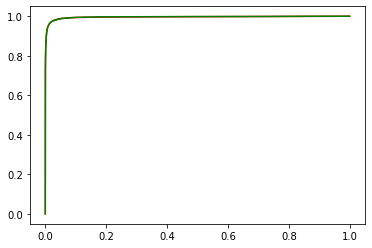

In [30]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

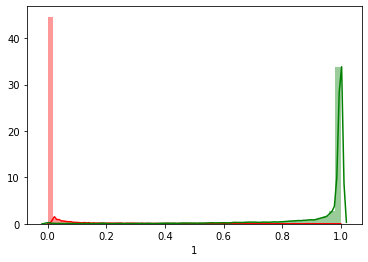

In [31]:
y_tt=pd.DataFrame([y_test.values,y_prob]).T
d0=y_tt[y_tt[0]==0.0]
d1=y_tt[y_tt[0]==1.0]
sns.distplot(d0[1],color='r')
sns.distplot(d1[1],color='g')

# Decision Tree

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  1.0
Confusion Matrix of train:  [[94721     0]
 [    0 25549]]
Auc of train:  1.0
Accuracy score of test:  0.9758269473275778
Confusion Matrix of test:  [[40030   675]
 [  571 10269]]
Auc of test:  0.9653709969264046


# Grid Search DT

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
max_depth=[2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9,10]
min_samples_leaf=[6,7,8,9,10,11,12,13,14,15,16,17,18]
criterion = ['gini','entropy']
param_grid={'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
gsearch=GridSearchCV(dtc, param_grid=param_grid, scoring='roc_auc',cv=3,n_jobs=-1)
gsearch.fit(X_train,y_train)
dtc=DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(gsearch.best_params_)

Accuracy score of train:  0.9763781491643801
Confusion Matrix of train:  [[93819   902]
 [ 1939 23610]]
Auc of train:  0.9968952796679925
Accuracy score of test:  0.9758657483752061
Confusion Matrix of test:  [[40268   437]
 [  807 10033]]
Auc of test:  0.9950351348987019
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 17, 'min_samples_split': 4}


# Randomized search DT

In [34]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
params={'max_depth':sp_randint(2,20),'min_samples_split':sp_randint(2,100),'min_samples_leaf':sp_randint(1,100),'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
rsearch=RandomizedSearchCV(dtc,param_distributions=params,n_iter=200, cv=3, scoring='roc_auc' ,n_jobs=-1)
rsearch.fit(X_train,y_train)
dtc=DecisionTreeClassifier(**rsearch.best_params_)
dtc.fit(X_train, y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(rsearch.best_params_)

Accuracy score of train:  0.9793963581940633
Confusion Matrix of train:  [[93941   780]
 [ 1698 23851]]
Auc of train:  0.99760235509356
Accuracy score of test:  0.9790474342807256
Confusion Matrix of test:  [[40357   348]
 [  732 10108]]
Auc of test:  0.9962158537873305
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 91, 'min_samples_split': 63}


# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score of train:  0.9970316787228736
Confusion Matrix of train:  [[94715     6]
 [  351 25198]]
Auc of train:  0.9999821442062202
Accuracy score of test:  0.94057619555728
Confusion Matrix of test:  [[40265   440]
 [ 2623  8217]]
Auc of test:  0.9800936628454848


In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params={'n_estimators':sp_randint(5,150), 'max_features':sp_randint(1,x.shape[1]),'max_depth':sp_randint(2,10),'min_samples_leaf':sp_randint(1,50),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}
rsearch=RandomizedSearchCV(rfc,param_distributions=params,n_jobs=-1,scoring='roc_auc',n_iter=100,cv=3)
rsearch.fit(X_train,y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rfc= RandomForestClassifier(**rsearch.best_params_)
rfc.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
y_train_pred=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print(rsearch.best_params_)

Accuracy score of train:  0.9840026606801363
Confusion Matrix of train:  [[94415   306]
 [ 1618 23931]]
Auc of train:  0.9986144296171354
Accuracy score of test:  0.9829275390435541
Confusion Matrix of test:  [[40518   187]
 [  693 10147]]
Auc of test:  0.9982062969045118
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 79, 'min_samples_leaf': 22, 'min_samples_split': 8, 'n_estimators': 147}


# Regularization

# without feature selection

In [129]:
from sklearn.model_selection import train_test_split
x=d1train.drop(['loan_status','out_prncp_inv','out_prncp','last_pymnt_amnt'],axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

Train Confusion Matrix:  [[93330  1391]
 [ 2299 23250]]
Train Accuracy score:  0.9693190321776004
Train ROC AUC score:  0.9922408215582639
Train Classification report:                precision    recall  f1-score   support

           0       0.98      0.99      0.98     94721
           1       0.94      0.91      0.93     25549

    accuracy                           0.97    120270
   macro avg       0.96      0.95      0.95    120270
weighted avg       0.97      0.97      0.97    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.98      0.99      0.98     40705
           1       0.94      0.91      0.93     10840

    accuracy                           0.97     51545
   macro avg       0.96      0.95      0.95     51545
weighted avg       0.97      0.97      0.97     51545

Test Confusion Matrix:  [[40103   602]
 [  972  9868]]
Test Accuracy score:  0.969463575516539
Test ROC AUC score:  0.9924287228193496


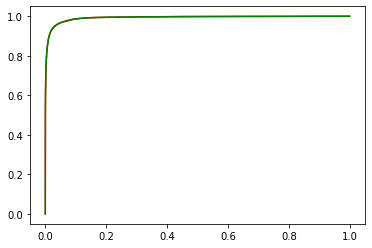

In [130]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l1',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Confusion Matrix:  [[92181  2540]
 [ 4072 21477]]
Train Accuracy score:  0.9450236966824644
Train ROC AUC score:  0.9822979553422132
Train Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.97     94721
           1       0.89      0.84      0.87     25549

    accuracy                           0.95    120270
   macro avg       0.93      0.91      0.92    120270
weighted avg       0.94      0.95      0.94    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.97     40705
           1       0.89      0.85      0.87     10840

    accuracy                           0.95     51545
   macro avg       0.93      0.91      0.92     51545
weighted avg       0.95      0.95      0.95     51545

Test Confusion Matrix:  [[39621  1084]
 [ 1630  9210]]
Test Accuracy score:  0.947346978368416
Test ROC AUC score:  0.9833759214327188


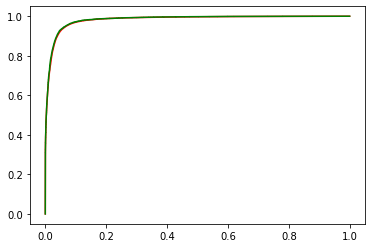

In [131]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

# Transformation without feature selection

In [132]:
from sklearn.model_selection import train_test_split
x=d1train.drop(['loan_status','out_prncp_inv','out_prncp','last_pymnt_amnt'],axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.preprocessing import PowerTransformer

transform=PowerTransformer(method='yeo-johnson')
X_train=transform.fit_transform(X_train)
X_test=transform.transform(X_test)

Train Confusion Matrix:  [[93830   891]
 [ 1009 24540]]
Train Accuracy score:  0.9842022116903634
Train ROC AUC score:  0.9963981977821287
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.96      0.96      0.96     25549

    accuracy                           0.98    120270
   macro avg       0.98      0.98      0.98    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.96      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.98      0.98      0.98     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40293   412]
 [  413 10427]]
Test Accuracy score:  0.9839945678533321
Test ROC AUC score:  0.99662697720209


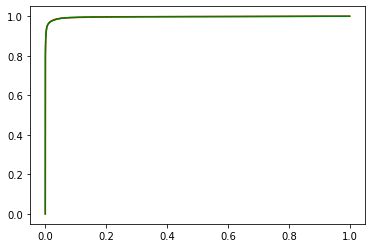

In [133]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l1',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

Train Confusion Matrix:  [[93829   892]
 [ 1006 24543]]
Train Accuracy score:  0.9842188409412156
Train ROC AUC score:  0.9963991238049204
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.96      0.96      0.96     25549

    accuracy                           0.98    120270
   macro avg       0.98      0.98      0.98    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.96      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.98      0.98      0.98     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40292   413]
 [  414 10426]]
Test Accuracy score:  0.9839557668057037
Test ROC AUC score:  0.9966208195861593


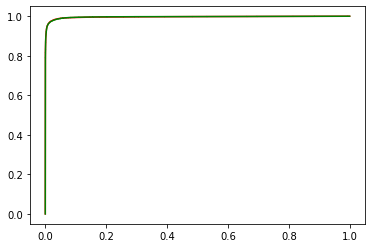

In [134]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

# With feature selection: l1,l2,elastic net

In [10]:
from sklearn.model_selection import train_test_split
x=d1train.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
          'total_bc_limit','addr_state_CA','application_type_1','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G',
          'sec_app_open_acc','num_rev_accts','total_rev_hi_lim','pub_rec','revol_bal','last_pymnt_amnt','out_prncp'],axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

Train Confusion Matrix:  [[92714  2007]
 [ 2674 22875]]
Train Accuracy score:  0.961079238380311
Train ROC AUC score:  0.9888802199721397
Train Classification report:                precision    recall  f1-score   support

           0       0.97      0.98      0.98     94721
           1       0.92      0.90      0.91     25549

    accuracy                           0.96    120270
   macro avg       0.95      0.94      0.94    120270
weighted avg       0.96      0.96      0.96    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.97      0.98      0.98     40705
           1       0.92      0.90      0.91     10840

    accuracy                           0.96     51545
   macro avg       0.95      0.94      0.94     51545
weighted avg       0.96      0.96      0.96     51545

Test Confusion Matrix:  [[39836   869]
 [ 1108  9732]]
Test Accuracy score:  0.9616451644194394
Test ROC AUC score:  0.9891441027172833


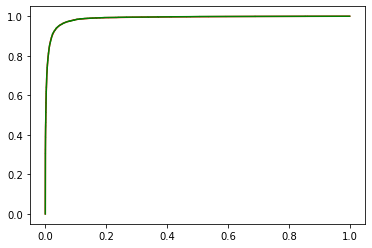

In [11]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l1',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Confusion Matrix:  [[92181  2540]
 [ 4072 21477]]
Train Accuracy score:  0.9450236966824644
Train ROC AUC score:  0.9822979553422132
Train Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.97     94721
           1       0.89      0.84      0.87     25549

    accuracy                           0.95    120270
   macro avg       0.93      0.91      0.92    120270
weighted avg       0.94      0.95      0.94    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.96      0.97      0.97     40705
           1       0.89      0.85      0.87     10840

    accuracy                           0.95     51545
   macro avg       0.93      0.91      0.92     51545
weighted avg       0.95      0.95      0.95     51545

Test Confusion Matrix:  [[39621  1084]
 [ 1630  9210]]
Test Accuracy score:  0.947346978368416
Test ROC AUC score:  0.9833759214327188


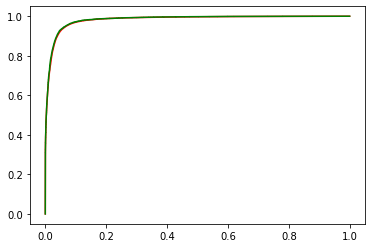

In [20]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Confusion Matrix:  [[91177  3544]
 [ 4859 20690]]
Train Accuracy score:  0.9301322025442754
Train ROC AUC score:  0.9722861675762028
Train Classification report:                precision    recall  f1-score   support

           0       0.95      0.96      0.96     94721
           1       0.85      0.81      0.83     25549

    accuracy                           0.93    120270
   macro avg       0.90      0.89      0.89    120270
weighted avg       0.93      0.93      0.93    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.95      0.96      0.96     40705
           1       0.85      0.82      0.83     10840

    accuracy                           0.93     51545
   macro avg       0.90      0.89      0.90     51545
weighted avg       0.93      0.93      0.93     51545

Test Confusion Matrix:  [[39194  1511]
 [ 2001  8839]]
Test Accuracy score:  0.9318653603647299
Test ROC AUC score:  0.9736243020273219


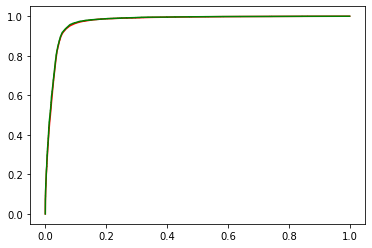

In [26]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='elasticnet',fit_intercept=True, solver = 'saga',l1_ratio=0.5,max_iter=1000)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

# Transformation with feature selection

In [125]:
from sklearn.model_selection import train_test_split
x=d1train.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
          'total_bc_limit','addr_state_CA','application_type_1','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G',
          'sec_app_open_acc','num_rev_accts','total_rev_hi_lim','pub_rec','revol_bal','last_pymnt_amnt','out_prncp'],axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.preprocessing import PowerTransformer

transform=PowerTransformer(method='yeo-johnson')
X_train=transform.fit_transform(X_train)
X_test=transform.transform(X_test)

Train Confusion Matrix:  [[93714  1007]
 [ 1163 24386]]
Train Accuracy score:  0.9819572628253097
Train ROC AUC score:  0.9958249785172114
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.96      0.95      0.96     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.95      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40248   457]
 [  495 10345]]
Test Accuracy score:  0.9815307013289358
Test ROC AUC score:  0.9960728189642787


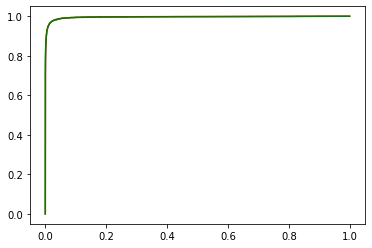

In [127]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l1',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

Train Confusion Matrix:  [[93716  1005]
 [ 1174 24375]]
Train Accuracy score:  0.9818824311964746
Train ROC AUC score:  0.9958211388903573
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.96      0.95      0.96     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.95      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40242   463]
 [  498 10342]]
Test Accuracy score:  0.9813560966146085
Test ROC AUC score:  0.9960638284370807


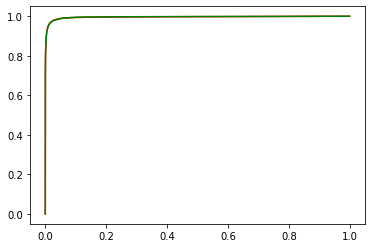

In [126]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

Train Confusion Matrix:  [[93717  1004]
 [ 1174 24375]]
Train Accuracy score:  0.9818907458219007
Train ROC AUC score:  0.9958224773052713
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.96      0.95      0.96     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.95      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40243   462]
 [  496 10344]]
Test Accuracy score:  0.981414298186051
Test ROC AUC score:  0.9960684449492818


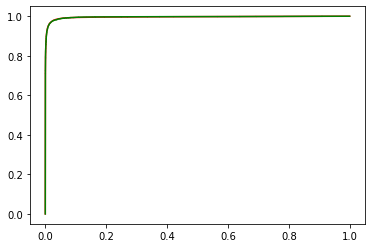

In [128]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='elasticnet',fit_intercept=True, solver = 'saga',l1_ratio=0.5,max_iter=1000)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

# RFE

In [29]:
from sklearn.model_selection import train_test_split
x=d1train[['funded_amnt', 'int_rate',  'installment',  'emp_length',  'dti',  'earliest_cr_line',  'inq_last_6mths',  'open_acc',
 'revol_util',  'total_acc',  'total_rec_prncp',  'total_rec_int',  'last_credit_pull_d',  'acc_now_delinq',  'open_acc_6m',  'open_act_il',  'open_il_24m',  'mths_since_rcnt_il',  'il_util',  'open_rv_12m',  'open_rv_24m',  'max_bal_bc',  'all_util',  'inq_fi',  'inq_last_12m',  'acc_open_past_24mths',  'bc_util',  'delinq_amnt',  'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',  'mo_sin_rcnt_rev_tl_op',  'mo_sin_rcnt_tl',  'mort_acc',  'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',  'num_actv_rev_tl',  'num_bc_sats',  'num_bc_tl',  'num_il_tl',  'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',  'num_sats', 'num_tl_90g_dpd_24m',  'num_tl_op_past_12m',  'percent_bc_gt_75', 'pub_rec_bankruptcies',  'sec_app_earliest_cr_line',  'sec_app_inq_last_6mths',  'sec_app_mort_acc',  'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',  'sec_app_num_rev_accts',  'sec_app_collections_12_mths_ex_med',  'sec_app_mths_since_last_major_derog',  'mths_since_last_delinq',  'mths_since_last_record',  'mths_since_last_major_derog', 'dti_joint', 'mths_since_recent_bc_dlq',  'mths_since_recent_revol_delinq',  'terms_compl',  'grade_B',  'grade_C', 'grade_D',  'grade_E',  'grade_G',  'home_ownership_OWN', 'home_ownership_RENT',  'verification_status_1', 'pymnt_plan_1',
 'purpose_debt_consolidation', 'purpose_major_purchase', 'purpose_small_business', 'addr_state_AR', 'addr_state_CO', 'addr_state_FL', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_MA', 'addr_state_MD', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_NC', 'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK', 'addr_state_TN', 'addr_state_UT', 'addr_state_VA', 'addr_state_WA', 'addr_state_WI', 'application_type_1', 'hardship_flag_1', 'issue_d_2', 'issue_d_3', 'issue_d_4', 'issue_d_5',
 'issue_d_7', 'issue_d_8', 'issue_d_10', 'issue_d_11', 'issue_d_12', 'total_rec_late_fee']]
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

Train Confusion Matrix:  [[92119  2602]
 [ 2607 22942]]
Train Accuracy score:  0.9566891161553172
Train ROC AUC score:  0.9869319266955946
Train Classification report:                precision    recall  f1-score   support

           0       0.97      0.97      0.97     94721
           1       0.90      0.90      0.90     25549

    accuracy                           0.96    120270
   macro avg       0.94      0.94      0.94    120270
weighted avg       0.96      0.96      0.96    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.98      0.97      0.97     40705
           1       0.90      0.91      0.90     10840

    accuracy                           0.96     51545
   macro avg       0.94      0.94      0.94     51545
weighted avg       0.96      0.96      0.96     51545

Test Confusion Matrix:  [[39577  1128]
 [  999  9841]]
Test Accuracy score:  0.9587350858473179
Test ROC AUC score:  0.9877833987773609


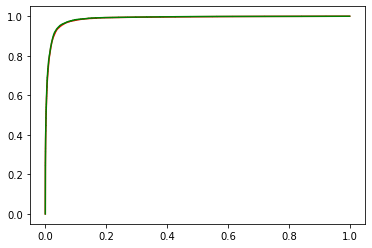

In [30]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

Train Confusion Matrix:  [[92941  1780]
 [ 2285 23264]]
Train Accuracy score:  0.9662010476428037
Train ROC AUC score:  0.9904049051350414
Train Classification report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98     94721
           1       0.93      0.91      0.92     25549

    accuracy                           0.97    120270
   macro avg       0.95      0.95      0.95    120270
weighted avg       0.97      0.97      0.97    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98     40705
           1       0.93      0.91      0.92     10840

    accuracy                           0.97     51545
   macro avg       0.95      0.95      0.95     51545
weighted avg       0.97      0.97      0.97     51545

Test Confusion Matrix:  [[39967   738]
 [  968  9872]]
Test Accuracy score:  0.9669027063730721
Test ROC AUC score:  0.9907637256817231


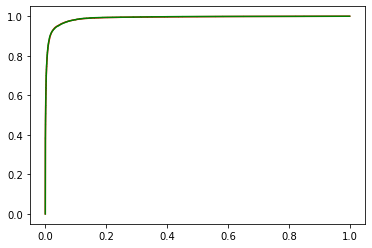

In [31]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l1',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

# RFE Transformation

In [121]:
from sklearn.model_selection import train_test_split
x=d1train[['funded_amnt', 'int_rate',  'installment',  'emp_length',  'dti',  'earliest_cr_line',  'inq_last_6mths',  'open_acc',
 'revol_util',  'total_acc',  'total_rec_prncp',  'total_rec_int',  'last_credit_pull_d',  'acc_now_delinq',  'open_acc_6m',  'open_act_il',  'open_il_24m',  'mths_since_rcnt_il',  'il_util',  'open_rv_12m',  'open_rv_24m',  'max_bal_bc',  'all_util',  'inq_fi',  'inq_last_12m',  'acc_open_past_24mths',  'bc_util',  'delinq_amnt',  'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',  'mo_sin_rcnt_rev_tl_op',  'mo_sin_rcnt_tl',  'mort_acc',  'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',  'num_actv_rev_tl',  'num_bc_sats',  'num_bc_tl',  'num_il_tl',  'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',  'num_sats', 'num_tl_90g_dpd_24m',  'num_tl_op_past_12m',  'percent_bc_gt_75', 'pub_rec_bankruptcies',  'sec_app_earliest_cr_line',  'sec_app_inq_last_6mths',  'sec_app_mort_acc',  'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',  'sec_app_num_rev_accts',  'sec_app_collections_12_mths_ex_med',  'sec_app_mths_since_last_major_derog',  'mths_since_last_delinq',  'mths_since_last_record',  'mths_since_last_major_derog', 'dti_joint', 'mths_since_recent_bc_dlq',  'mths_since_recent_revol_delinq',  'terms_compl',  'grade_B',  'grade_C', 'grade_D',  'grade_E',  'grade_G',  'home_ownership_OWN', 'home_ownership_RENT',  'verification_status_1', 'pymnt_plan_1',
 'purpose_debt_consolidation', 'purpose_major_purchase', 'purpose_small_business', 'addr_state_AR', 'addr_state_CO', 'addr_state_FL', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_MA', 'addr_state_MD', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_NC', 'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK', 'addr_state_TN', 'addr_state_UT', 'addr_state_VA', 'addr_state_WA', 'addr_state_WI', 'application_type_1', 'hardship_flag_1', 'issue_d_2', 'issue_d_3', 'issue_d_4', 'issue_d_5',
 'issue_d_7', 'issue_d_8', 'issue_d_10', 'issue_d_11', 'issue_d_12', 'total_rec_late_fee']]
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.preprocessing import PowerTransformer

transform=PowerTransformer(method='yeo-johnson')
X_train=transform.fit_transform(X_train)
X_test=transform.transform(X_test)

Train Confusion Matrix:  [[93431  1290]
 [ 1382 24167]]
Train Accuracy score:  0.9777833208613952
Train ROC AUC score:  0.9950796140533201
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.95      0.95      0.95     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.95      0.95      0.95     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40164   541]
 [  563 10277]]
Test Accuracy score:  0.9785818217091862
Test ROC AUC score:  0.9954567944770469


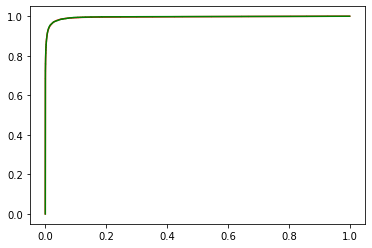

In [122]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l1',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

Train Confusion Matrix:  [[93425  1296]
 [ 1392 24157]]
Train Accuracy score:  0.9776502868545772
Train ROC AUC score:  0.9950755988085782
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.95      0.95      0.95     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.95      0.95      0.95     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40162   543]
 [  571 10269]]
Test Accuracy score:  0.9783878164710447
Test ROC AUC score:  0.9954506277958002


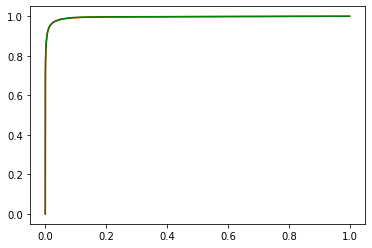

In [123]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Confusion Matrix:  [[93425  1296]
 [ 1393 24156]]
Train Accuracy score:  0.9776419722291511
Train ROC AUC score:  0.9950764107830476
Train Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     94721
           1       0.95      0.95      0.95     25549

    accuracy                           0.98    120270
   macro avg       0.97      0.97      0.97    120270
weighted avg       0.98      0.98      0.98    120270

Test Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.95      0.95      0.95     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Confusion Matrix:  [[40162   543]
 [  572 10268]]
Test Accuracy score:  0.9783684159472306
Test ROC AUC score:  0.9954567310198343


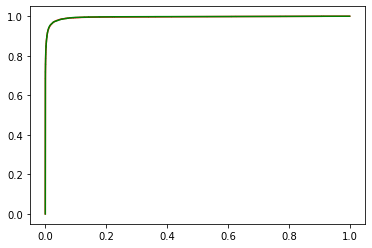

In [124]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='elasticnet',fit_intercept=True, solver = 'saga',l1_ratio=0.5,max_iter=100)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_prob=lr.predict_proba(X_test)[:,1]


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

y_tpred=lr.predict(X_train)
y_tprob=lr.predict_proba(X_train)[:,1]


print('Train Confusion Matrix: ',confusion_matrix(y_train, y_tpred))

print('Train Accuracy score: ',accuracy_score(y_train, y_tpred))

print('Train ROC AUC score: ',roc_auc_score(y_train,y_tprob))
print('Train Classification report: ',classification_report(y_train,y_tpred))

print('Test Classification report: ',classification_report(y_test,y_pred))
print('Test Confusion Matrix: ',confusion_matrix(y_test, y_pred))
print('Test Accuracy score: ',accuracy_score(y_test, y_pred))
print('Test ROC AUC score: ',roc_auc_score(y_test,y_prob))

tfpr,ttpr,tthres=roc_curve(y_train,y_tprob)
fpr, tpr, thres = roc_curve(y_test,y_prob)
plt.plot(tfpr,ttpr,c='r')
plt.plot(fpr,tpr,c='g')

# Boosting

In [8]:
from sklearn.model_selection import train_test_split
x=d1train.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
          'total_bc_limit','addr_state_CA','application_type_1','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G',
          'sec_app_open_acc','num_rev_accts','total_rev_hi_lim','pub_rec','revol_bal','last_pymnt_amnt','out_prncp'],axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [136]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
lgb.fit(X_train,y_train)
y_train_pred=lgb.predict(X_train)
y_train_prob=lgb.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=lgb.predict(X_test)
y_test_prob=lgb.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9906793048973144
Confusion Matrix of train:  [[94548   173]
 [  948 24601]]
Auc of train:  0.9995392042821026
Accuracy score of test:  0.9873314579493646
Confusion Matrix of test:  [[40513   192]
 [  461 10379]]
Auc of test:  0.9988194080257963


In [137]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params={'n_estimators': sp_randint(50,200), 'num_leaves':sp_randint(10,50),'max_depth':sp_randint(2,15),'learning_rate':sp_uniform(0,1),'min_child_samples':(2,50)}
rsearch=RandomizedSearchCV(estimator=lgb,param_distributions=params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=1,n_iter=100)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023D6112AD08

In [138]:
lgb=LGBMClassifier(**rsearch.best_params_)
lgb.fit(X_train,y_train)
y_train_pred=lgb.predict(X_train)
y_train_prob=lgb.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=lgb.predict(X_test)
y_test_prob=lgb.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9927080735012888
Confusion Matrix of train:  [[94594   127]
 [  750 24799]]
Auc of train:  0.9996811762618685
Accuracy score of test:  0.9878358715685324
Confusion Matrix of test:  [[40520   185]
 [  442 10398]]
Auc of test:  0.9988605079024626


In [85]:
import xgboost as xgb

In [9]:
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
y_train_pred=xgbc.predict(X_train)
y_train_prob=xgbc.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=xgbc.predict(X_test)
y_test_prob=xgbc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))


Accuracy score of train:  0.9817161386879522
Confusion Matrix of train:  [[93839   882]
 [ 1317 24232]]
Auc of train:  0.9975098588049579
Accuracy score of test:  0.9814919002813076
Confusion Matrix of test:  [[40278   427]
 [  527 10313]]
Auc of test:  0.9975231766136603


In [10]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgbc = xgb.XGBClassifier()
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
params={ 'max_depth':sp_randint(2,15),'learning_rate':sp_uniform(0,1),'min_child_weight':sp_randint(2,30)}
rsearch=RandomizedSearchCV(estimator=xgbc,param_distributions=params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=1,n_iter=30)
rsearch.fit(x,y)
xgbc = xgb.XGBClassifier(**rsearch.best_params_)
xgbc.fit(X_train,y_train)
y_train_pred=xgbc.predict(X_train)
y_train_prob=xgbc.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=xgbc.predict(X_test)
y_test_prob=xgbc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9893572794545605
Confusion Matrix of train:  [[94351   370]
 [  910 24639]]
Auc of train:  0.9990864890531344
Accuracy score of test:  0.9874284605684354
Confusion Matrix of test:  [[40472   233]
 [  415 10425]]
Auc of test:  0.9986965423978034


# SelectKBest Boosting

In [141]:
d3=d[['funded_amnt','loan_status', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
 'revol_util', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'collections_12_mths_ex_med',
 'acc_now_delinq', 'tot_coll_amt', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util',
 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_sats',
 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
 'total_il_high_credit_limit', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_revol_util',
 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'terms_compl',
 'home_ownership','term','verification_status','issue_d','initial_list_status','purpose']]

d3d=pd.get_dummies(data=d3,columns=['home_ownership','term','verification_status','issue_d','initial_list_status','purpose'],drop_first=True)

x=d3d.drop('loan_status',axis=1)
y=d3d['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [142]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
lgb.fit(X_train,y_train)
y_train_pred=lgb.predict(X_train)
y_train_prob=lgb.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=lgb.predict(X_test)
y_test_prob=lgb.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9901471688700424
Confusion Matrix of train:  [[94558   163]
 [ 1022 24527]]
Auc of train:  0.9994916010908406
Accuracy score of test:  0.9871568532350373
Confusion Matrix of test:  [[40551   154]
 [  508 10332]]
Auc of test:  0.9987144407311903


In [143]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params={'n_estimators': sp_randint(50,200), 'num_leaves':sp_randint(10,50),'max_depth':sp_randint(2,15),'learning_rate':sp_uniform(0,1),'min_child_samples':(2,50)}
rsearch=RandomizedSearchCV(estimator=lgb,param_distributions=params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=1,n_iter=100)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023D5F4DB908

In [144]:
lgb=LGBMClassifier(**rsearch.best_params_)
lgb.fit(X_train,y_train)
y_train_pred=lgb.predict(X_train)
y_train_prob=lgb.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=lgb.predict(X_test)
y_test_prob=lgb.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9815581608048557
Confusion Matrix of train:  [[93922   799]
 [ 1419 24130]]
Auc of train:  0.9888254023980492
Accuracy score of test:  0.9809874866621399
Confusion Matrix of test:  [[40320   385]
 [  595 10245]]
Auc of test:  0.9881773082900955


In [145]:
import xgboost as xgb

In [146]:
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
y_train_pred=xgbc.predict(X_train)
y_train_prob=xgbc.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=xgbc.predict(X_test)
y_test_prob=xgbc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))


Accuracy score of train:  0.9810093955267315
Confusion Matrix of train:  [[93812   909]
 [ 1375 24174]]
Auc of train:  0.9974394401641571
Accuracy score of test:  0.9804442719953439
Confusion Matrix of test:  [[40266   439]
 [  569 10271]]
Auc of test:  0.9973964956207724


# RFE Boosting

In [147]:
from sklearn.model_selection import train_test_split
x=d1train[['funded_amnt', 'int_rate',  'installment',  'emp_length',  'dti',  'earliest_cr_line',  'inq_last_6mths',  'open_acc',
 'revol_util',  'total_acc',  'total_rec_prncp',  'total_rec_int',  'last_credit_pull_d',  'acc_now_delinq',  'open_acc_6m',  'open_act_il',  'open_il_24m',  'mths_since_rcnt_il',  'il_util',  'open_rv_12m',  'open_rv_24m',  'max_bal_bc',  'all_util',  'inq_fi',  'inq_last_12m',  'acc_open_past_24mths',  'bc_util',  'delinq_amnt',  'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',  'mo_sin_rcnt_rev_tl_op',  'mo_sin_rcnt_tl',  'mort_acc',  'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',  'num_actv_rev_tl',  'num_bc_sats',  'num_bc_tl',  'num_il_tl',  'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',  'num_sats', 'num_tl_90g_dpd_24m',  'num_tl_op_past_12m',  'percent_bc_gt_75', 'pub_rec_bankruptcies',  'sec_app_earliest_cr_line',  'sec_app_inq_last_6mths',  'sec_app_mort_acc',  'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',  'sec_app_num_rev_accts',  'sec_app_collections_12_mths_ex_med',  'sec_app_mths_since_last_major_derog',  'mths_since_last_delinq',  'mths_since_last_record',  'mths_since_last_major_derog', 'dti_joint', 'mths_since_recent_bc_dlq',  'mths_since_recent_revol_delinq',  'terms_compl',  'grade_B',  'grade_C', 'grade_D',  'grade_E',  'grade_G',  'home_ownership_OWN', 'home_ownership_RENT',  'verification_status_1', 'pymnt_plan_1',
 'purpose_debt_consolidation', 'purpose_major_purchase', 'purpose_small_business', 'addr_state_AR', 'addr_state_CO', 'addr_state_FL', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_MA', 'addr_state_MD', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_NC', 'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK', 'addr_state_TN', 'addr_state_UT', 'addr_state_VA', 'addr_state_WA', 'addr_state_WI', 'application_type_1', 'hardship_flag_1', 'issue_d_2', 'issue_d_3', 'issue_d_4', 'issue_d_5',
 'issue_d_7', 'issue_d_8', 'issue_d_10', 'issue_d_11', 'issue_d_12', 'total_rec_late_fee']]
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [148]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
lgb.fit(X_train,y_train)
y_train_pred=lgb.predict(X_train)
y_train_prob=lgb.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=lgb.predict(X_test)
y_test_prob=lgb.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9900307641140766
Confusion Matrix of train:  [[94525   196]
 [ 1003 24546]]
Auc of train:  0.9994569613922243
Accuracy score of test:  0.9865554369967989
Confusion Matrix of test:  [[40514   191]
 [  502 10338]]
Auc of test:  0.9986118870769839


In [149]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params={'n_estimators': sp_randint(50,200), 'num_leaves':sp_randint(10,50),'max_depth':sp_randint(2,15),'learning_rate':sp_uniform(0,1),'min_child_samples':(2,50)}
rsearch=RandomizedSearchCV(estimator=lgb,param_distributions=params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=1,n_iter=100)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023D6052E1C8

In [150]:
lgb=LGBMClassifier(**rsearch.best_params_)
lgb.fit(X_train,y_train)
y_train_pred=lgb.predict(X_train)
y_train_prob=lgb.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=lgb.predict(X_test)
y_test_prob=lgb.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9996923588592334
Confusion Matrix of train:  [[94720     1]
 [   36 25513]]
Auc of train:  0.9999998429769474
Accuracy score of test:  0.9880880783781162
Confusion Matrix of test:  [[40573   132]
 [  482 10358]]
Auc of test:  0.9987141506410765


In [151]:
import xgboost as xgb

In [152]:
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
y_train_pred=xgbc.predict(X_train)
y_train_prob=xgbc.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=xgbc.predict(X_test)
y_test_prob=xgbc.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))


Accuracy score of train:  0.9804938887503118
Confusion Matrix of train:  [[93758   963]
 [ 1383 24166]]
Auc of train:  0.997092220666451
Accuracy score of test:  0.9799980599476186
Confusion Matrix of test:  [[40258   447]
 [  584 10256]]
Auc of test:  0.9971130515168314


# Neural Network

In [6]:
from sklearn.model_selection import train_test_split
x=d1train.drop(['loan_status','out_prncp_inv','out_prncp','last_pymnt_amnt'],axis=1)
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
X_train.shape

(120270, 177)

In [7]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [85]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()

#Normalize input data
model.add(tf.keras.layers.BatchNormalization(input_shape=(177,)))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(177,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [112]:
model.fit(X_train, y_train, batch_size=1000,epochs=10,use_multiprocessing=True)

Train on 120270 samples
Epoch 1/10
120270/120270 [==============================] - 4s 33us/sample - loss: 0.0081 - accuracy: 0.9986
Epoch 2/10
120270/120270 [==============================] - 2s 21us/sample - loss: 0.0086 - accuracy: 0.9983
Epoch 3/10
120270/120270 [==============================] - 2s 16us/sample - loss: 0.0082 - accuracy: 0.9985
Epoch 4/10
120270/120270 [==============================] - 2s 15us/sample - loss: 0.0080 - accuracy: 0.9985
Epoch 5/10
120270/120270 [==============================] - 2s 13us/sample - loss: 0.0074 - accuracy: 0.9987
Epoch 6/10
120270/120270 [==============================] - 2s 13us/sample - loss: 0.0075 - accuracy: 0.9987
Epoch 7/10
120270/120270 [==============================] - 2s 13us/sample - loss: 0.0071 - accuracy: 0.9988
Epoch 8/10
120270/120270 [==============================] - 2s 13us/sample - loss: 0.0064 - accuracy: 0.9990
Epoch 9/10
120270/120270 [==============================] - 2s 14us/sample - loss: 0.0067 - accuracy: 0.

In [113]:
score = model.evaluate(X_train, y_train,batch_size=1000)
score

120270/120270 [==============================] - 1s 10us/sample - loss: 0.0044 - accuracy: 0.9997


[0.0044130931639043535, 0.9996674]

In [114]:
pred=model.predict(X_test,batch_size=1000)

In [117]:
y_pred=[]
for i in pred:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [120]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
print('Test CM: ',confusion_matrix(y_test,y_pred))
print('Test CR: ',classification_report(y_test,y_pred))
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('Test ROC AUC: ',roc_auc_score(y_test,pred))

Test CM:  [[40260   445]
 [  460 10380]]
Test CR:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     40705
           1       0.96      0.96      0.96     10840

    accuracy                           0.98     51545
   macro avg       0.97      0.97      0.97     51545
weighted avg       0.98      0.98      0.98     51545

Test Accuracy:  0.9824425259482006
Test ROC AUC:  0.9978469919694898


# RFE NN

In [8]:
from sklearn.model_selection import train_test_split
x=d1train[['funded_amnt', 'int_rate',  'installment',  'emp_length',  'dti',  'earliest_cr_line',  'inq_last_6mths',  'open_acc',
 'revol_util',  'total_acc',  'total_rec_prncp',  'total_rec_int',  'last_credit_pull_d',  'acc_now_delinq',  'open_acc_6m',  'open_act_il',  'open_il_24m',  'mths_since_rcnt_il',  'il_util',  'open_rv_12m',  'open_rv_24m',  'max_bal_bc',  'all_util',  'inq_fi',  'inq_last_12m',  'acc_open_past_24mths',  'bc_util',  'delinq_amnt',  'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',  'mo_sin_rcnt_rev_tl_op',  'mo_sin_rcnt_tl',  'mort_acc',  'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',  'num_actv_rev_tl',  'num_bc_sats',  'num_bc_tl',  'num_il_tl',  'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',  'num_sats', 'num_tl_90g_dpd_24m',  'num_tl_op_past_12m',  'percent_bc_gt_75', 'pub_rec_bankruptcies',  'sec_app_earliest_cr_line',  'sec_app_inq_last_6mths',  'sec_app_mort_acc',  'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',  'sec_app_num_rev_accts',  'sec_app_collections_12_mths_ex_med',  'sec_app_mths_since_last_major_derog',  'mths_since_last_delinq',  'mths_since_last_record',  'mths_since_last_major_derog', 'dti_joint', 'mths_since_recent_bc_dlq',  'mths_since_recent_revol_delinq',  'terms_compl',  'grade_B',  'grade_C', 'grade_D',  'grade_E',  'grade_G',  'home_ownership_OWN', 'home_ownership_RENT',  'verification_status_1', 'pymnt_plan_1',
 'purpose_debt_consolidation', 'purpose_major_purchase', 'purpose_small_business', 'addr_state_AR', 'addr_state_CO', 'addr_state_FL', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_MA', 'addr_state_MD', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_NC', 'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK', 'addr_state_TN', 'addr_state_UT', 'addr_state_VA', 'addr_state_WA', 'addr_state_WI', 'application_type_1', 'hardship_flag_1', 'issue_d_2', 'issue_d_3', 'issue_d_4', 'issue_d_5',
 'issue_d_7', 'issue_d_8', 'issue_d_10', 'issue_d_11', 'issue_d_12', 'total_rec_late_fee']]
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
X_train.shape

(120270, 113)

In [79]:
1

In [80]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()

#Normalize input data
model.add(tf.keras.layers.BatchNormalization(input_shape=(113,)))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(113,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
#Compile the model - add Loss and Adam optimizer
adam=tf.keras.optimizers.Adam(learning_rate=0.03)
model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
model.fit(X_train, y_train, batch_size=1000,epochs=10,use_multiprocessing=True)

Train on 120270 samples
Epoch 1/10
120270/120270 [==============================] - 4s 30us/sample - loss: 0.0556 - acc: 0.9797
Epoch 2/10
120270/120270 [==============================] - 2s 20us/sample - loss: 0.0492 - acc: 0.9815
Epoch 3/10
120270/120270 [==============================] - 2s 16us/sample - loss: 0.0482 - acc: 0.9821
Epoch 4/10
120270/120270 [==============================] - 2s 14us/sample - loss: 0.0478 - acc: 0.9823
Epoch 5/10
120270/120270 [==============================] - 1s 11us/sample - loss: 0.0475 - acc: 0.9824
Epoch 6/10
120270/120270 [==============================] - 2s 13us/sample - loss: 0.0474 - acc: 0.9825
Epoch 7/10
120270/120270 [==============================] - 1s 12us/sample - loss: 0.0462 - acc: 0.98291s - loss: 
Epoch 8/10
120270/120270 [==============================] - 1s 12us/sample - loss: 0.0451 - acc: 0.9830
Epoch 9/10
120270/120270 [==============================] - 1s 11us/sample - loss: 0.0483 - acc: 0.9819
Epoch 10/10
120270/120270 [==

In [77]:
score = model.evaluate(X_train, y_train,batch_size=1000)
score

120270/120270 [==============================] - 2s 19us/sample - loss: 0.0198 - acc: 0.99220s - loss: 0.0196 - acc: 0


[0.019780247474472264, 0.9921593]

In [37]:
pred=model.predict(X_test,batch_size=100)

In [38]:
y_pred=[]
for i in pred:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
print('Test CM: ',confusion_matrix(y_test,y_pred))
print('Test CR: ',classification_report(y_test,y_pred))
print('Test Accuracy: ',accuracy_score(y_test,y_pred))
print('Test ROC AUC: ',roc_auc_score(y_test,pred))

Test CM:  [[40535   170]
 [  589 10251]]
Test CR:                precision    recall  f1-score   support

           0       0.99      1.00      0.99     40705
           1       0.98      0.95      0.96     10840

    accuracy                           0.99     51545
   macro avg       0.98      0.97      0.98     51545
weighted avg       0.99      0.99      0.99     51545

Test Accuracy:  0.9852750024250655
Test ROC AUC:  0.9977468213602415
